In [2]:
import plotly.offline as pyo

import matplotlib.pyplot as plt
import seaborn as sns


from PIL import Image

import plotly.graph_objs as go
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\uthka\Documents\sensors n tech project\archive (6)\Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

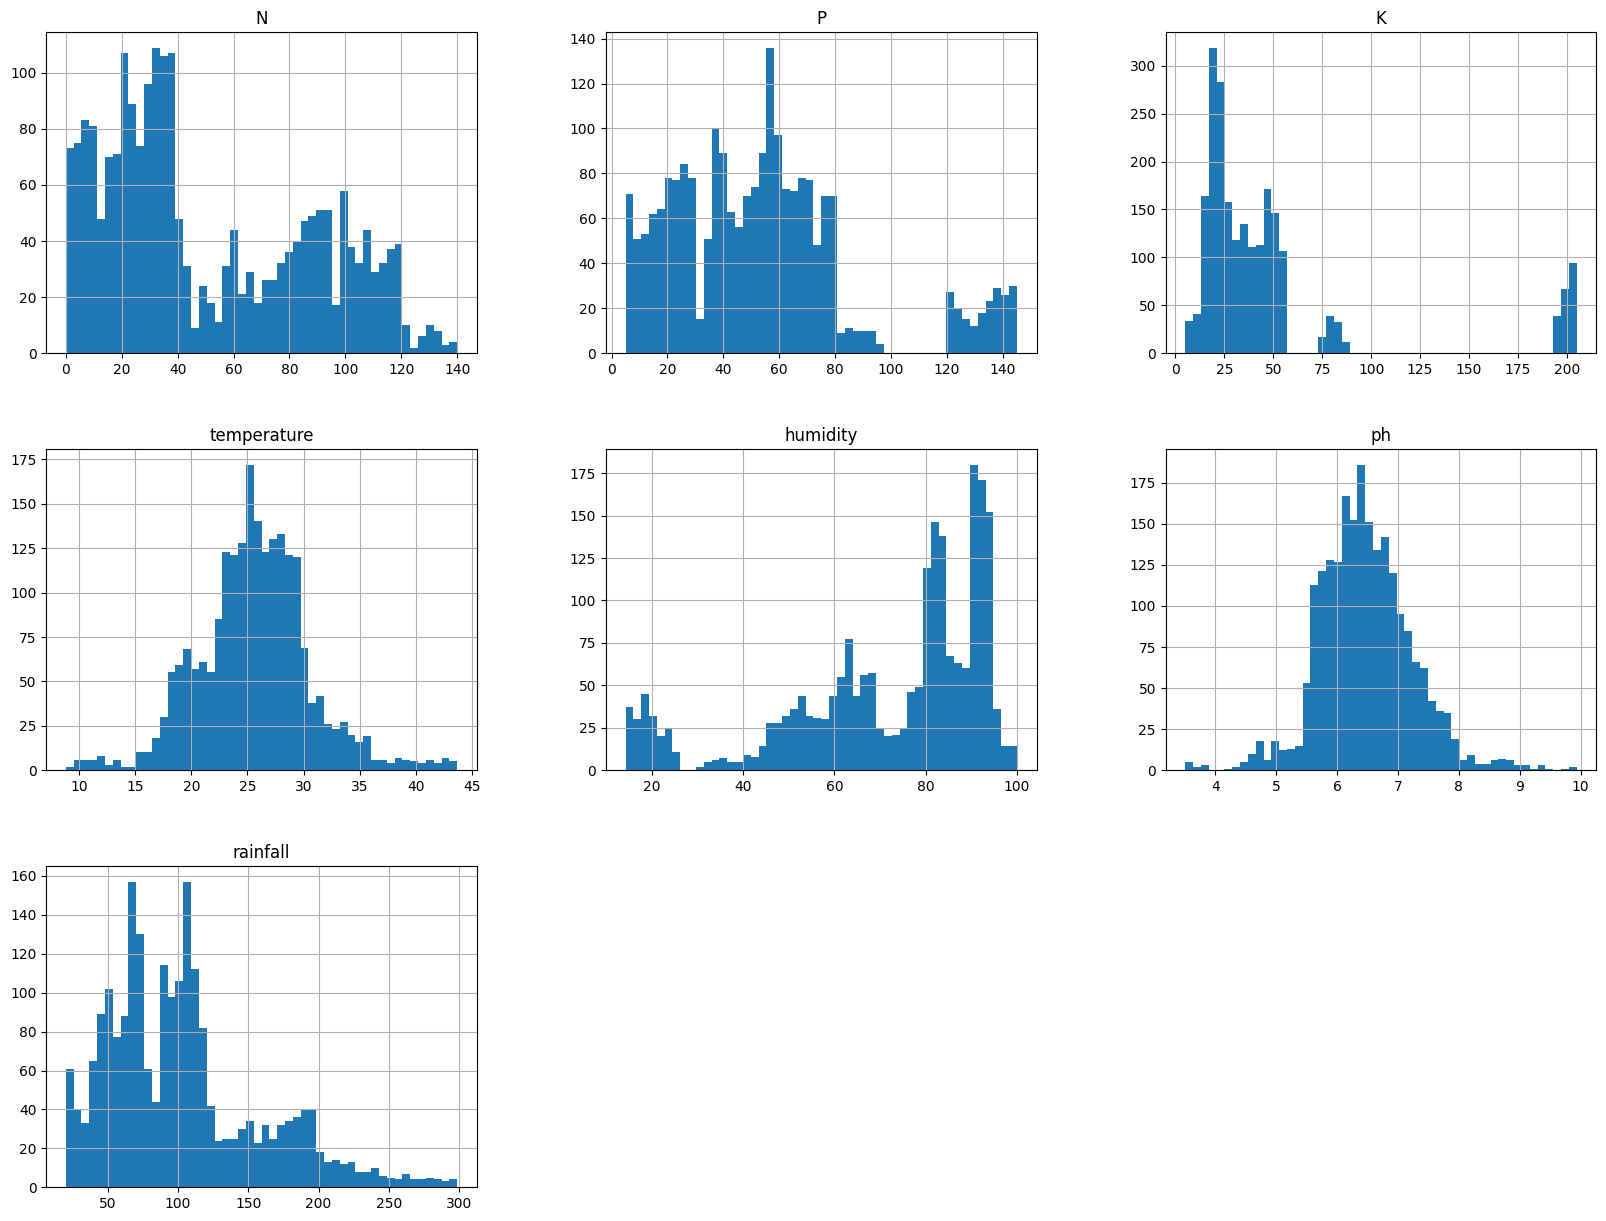

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
df_numeric = df.select_dtypes(include=[float, int])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


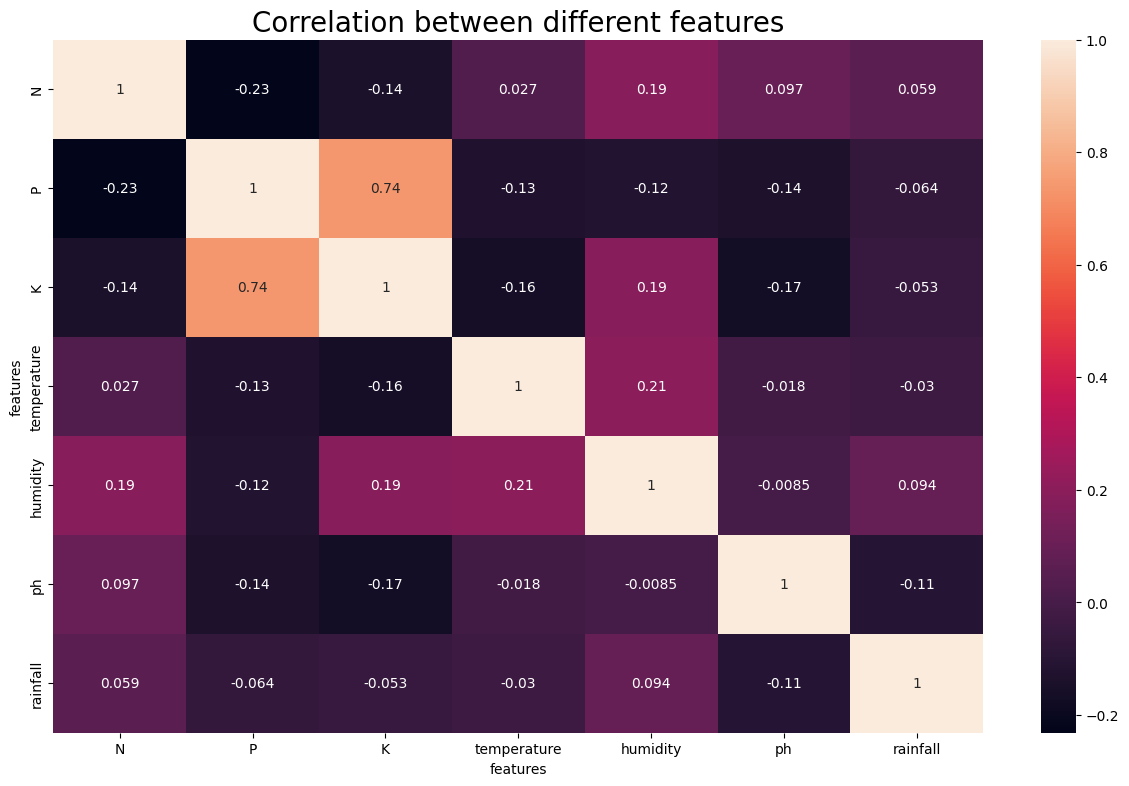

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df_numeric.corr(), annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()


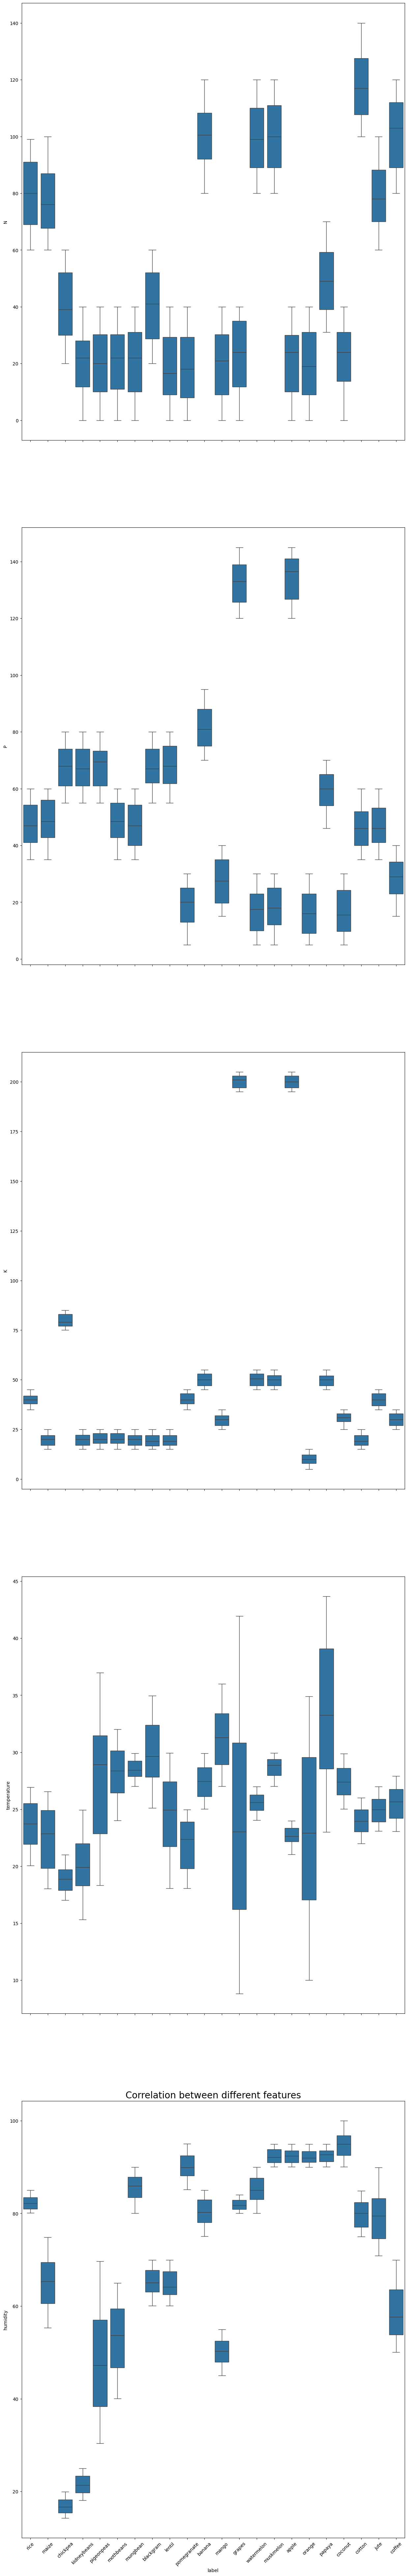

In [11]:
columns = ['N', 'P', 'K', 'temperature', 'humidity']
fig, ax = plt.subplots(5, 1, figsize=(15, 100), sharex=True)
i = 0
for column in columns:
    sns.boxplot(data=df, x='label', y=column, ax=ax[i])
    plt.xticks(rotation=45)
    i = i + 1
plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()

In [12]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


target = ['label']
features = ['N', 'P', 'K', 'temperature', 'humidity']

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

c=LogisticRegression(random_state=0)
d=DecisionTreeClassifier(random_state=0)

f=GradientBoostingClassifier(random_state=0)
g=KNeighborsClassifier()
h=RandomForestClassifier(random_state=0)
j=SVC(random_state=0)
k=GaussianNB()

models = []
models.append(('Logistic Regression', c))
models.append(('Decision Tree Classifier', d))
models.append(('Gradient Boosting Classifier', f))
models.append(('K Neighbors Classifier', g))
models.append(('Random Forest Classifier', h))
models.append(('SVM Classifier', j))
models.append(('Naive Bayes Classifier', k))

model_name = [] 
accuracy = []

for name, model in models: 
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    model_name.append(name)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    b=metrics.accuracy_score(y_test,y_pred)
    print(name, b)
m=max(accuracy)
a=(model_name[i] if accuracy[i]== max(accuracy) else None)
print("\nThe model with maximum accuracy score is:\t", a)
#print(accuracy)

c:\Users\uthka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\uthka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\uthka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

Logistic Regression 0.8842975206611571
Decision Tree Classifier 0.9380165289256198
Gradient Boosting Classifier 0.940771349862259
K Neighbors Classifier 0.9077134986225895


c:\Users\uthka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

c:\Users\uthka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest Classifier 0.953168044077135
SVM Classifier 0.8746556473829201
Naive Bayes Classifier 0.9517906336088154

The model with maximum accuracy score is:	 None


c:\Users\uthka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\uthka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [13]:
model1=GaussianNB()
model1.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       1.00      1.00      1.00        28
   blackgram       0.74      0.79      0.77        29
    chickpea       1.00      1.00      1.00        41
     coconut       1.00      1.00      1.00        35
      coffee       1.00      1.00      1.00        33
      cotton       0.97      1.00      0.99        33
      grapes       1.00      1.00      1.00        25
        jute       0.90      0.77      0.83        35
 kidneybeans       1.00      1.00      1.00        41
      lentil       0.73      0.86      0.79        28
       maize       1.00      0.97      0.98        32
       mango       1.00      1.00      1.00        34
   mothbeans       0.90      0.95      0.92        38
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        27
      papaya       1.00    

c:\Users\uthka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [14]:
data = np.array([[14,18, 3, 23.603016, 20]])
prediction = k.predict(data)
print(prediction)

['kidneybeans']


c:\Users\uthka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [15]:
data = np.array([[20, 24, 240, 110.79, 37.86]])
prediction = d.predict(data)
print(prediction)

['grapes']


c:\Users\uthka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [19]:
data=np.array([[2,24,240,55,37.86]])
x=int(input("1.DO you want us to give you a recommendation \n 2. or do you have soem crops that you want to grow:"))
if(x==1):
    prediction=k.predict(data)
    print("For the values that we have got from the sensors, the plant that will be the most suitable for growing is: ",prediction)
else:
    print("that table")

that table
